# FNC - FakeNewsChallenge

Link: [https://github.com/FakeNewsChallenge/fnc-1](https://github.com/FakeNewsChallenge/fnc-1)

This jupyter notebook covers descriptive analysis of **FNC - FakeNewsChallenge** dataset. 

**Note:** Repository contains more files, train, test and competition test files. In this analysis, we will analyse just **train** dataset.

## Attributes

* **headline** - headline of the new
* **body** - body of the new
* **stance**:
    * unrelated
    * discuss
    * agree
    * disagree

## Setup and import libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

Because data are divided into two files (stances and bodies of the news are separated), we need to join them:

In [24]:
# read both files
df_bodies = pd.read_csv('data/train_bodies.csv')
df_stances = pd.read_csv('data/train_stances.csv')

# let's merge both files
df = pd.merge(df_stances, df_bodies, on='Body ID')

## Analysis

### Count of records

In [25]:
len(df)

49972

### Data examples

In [26]:
df.head()

,Headline,Body ID,Stance,articleBody
0,Police find mass graves with at least '15 bodi...,712,unrelated,Danny Boyle is directing the untitled film\r\n...
1,Seth Rogen to Play Apple’s Steve Wozniak,712,discuss,Danny Boyle is directing the untitled film\r\n...
2,Mexico police find mass grave near site 43 stu...,712,unrelated,Danny Boyle is directing the untitled film\r\n...
3,Mexico Says Missing Students Not Found In Firs...,712,unrelated,Danny Boyle is directing the untitled film\r\n...
4,New iOS 8 bug can delete all of your iCloud do...,712,unrelated,Danny Boyle is directing the untitled film\r\n...


### More information about data

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49972 entries, 0 to 49971
Data columns (total 4 columns):
Headline       49972 non-null object
Body ID        49972 non-null int64
Stance         49972 non-null object
articleBody    49972 non-null object
dtypes: int64(1), object(3)
memory usage: 1.9+ MB


In [28]:
df.describe(include='all')

,Headline,Body ID,Stance,articleBody
count,49972,49972.000000,49972,49972
unique,1648,NaN,4,1669
top,ISIL Beheads American Photojournalist in Iraq,NaN,unrelated,The man who jumped the White House fence this ...
freq,127,NaN,36545,187
mean,NaN,1366.254863,NaN,NaN
std,NaN,730.086644,NaN,NaN
min,NaN,0.000000,NaN,NaN
25%,NaN,737.750000,NaN,NaN
50%,NaN,1419.000000,NaN,NaN
75%,NaN,2002.000000,NaN,NaN


### NaN values

Are there any NaN values in our data?

In [29]:
df.isnull().values.any()

False

Let's look at NaN values per each column:

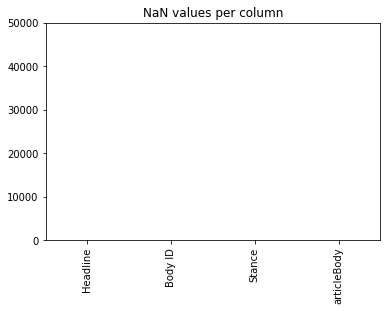

In [30]:
df.isnull().sum().plot(kind='bar', ylim=(0, len(df)), title='NaN values per column')

### Attributes analysis

What is the distribution of fake news labels in our data?

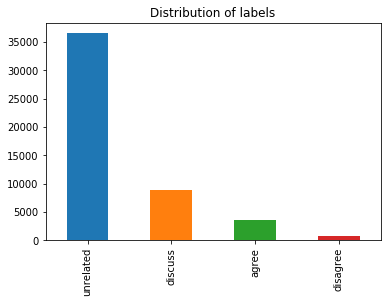

In [31]:
df['Stance'].value_counts().plot(kind='bar', title='Distribution of labels')